<a href="https://colab.research.google.com/github/divyat-thv/Codveda1/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

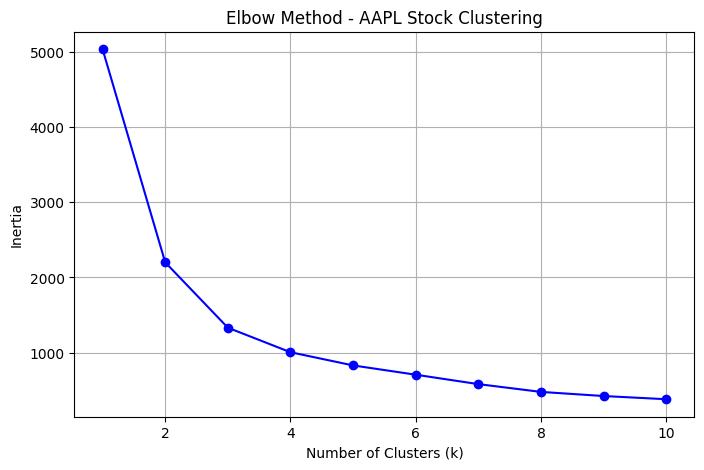

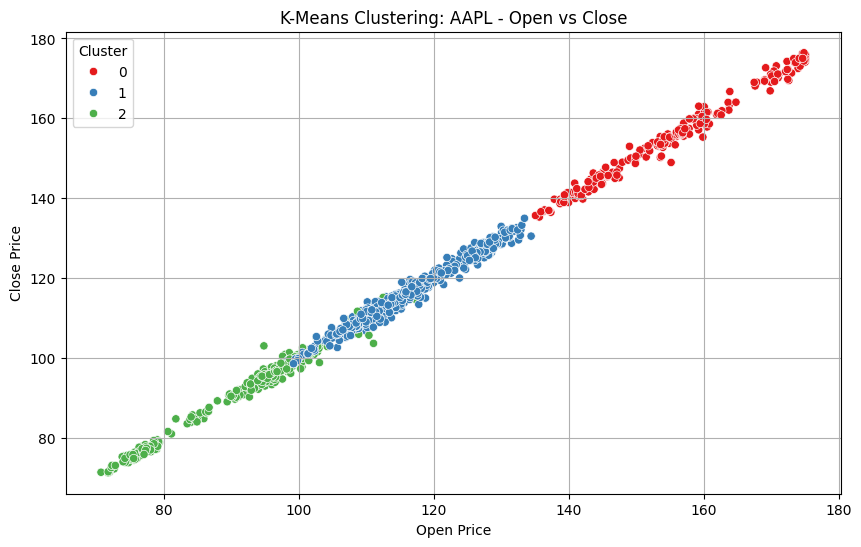

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('2) Stock Prices Data Set.csv')
df.dropna(inplace=True)

# Filter one stock (e.g., AAPL)
df = df[df['symbol'] == 'AAPL'].copy()

# Select numeric features for clustering
features = df[['open', 'high', 'low', 'close', 'volume']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - AAPL Stock Clustering')
plt.grid(True)
plt.show()

# From elbow plot, choose optimal k (e.g., 3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df['cluster'] = clusters

# Visualize clusters using 2D projection (open vs close)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['open'], y=df['close'], hue=df['cluster'], palette='Set1')
plt.title('K-Means Clustering: AAPL - Open vs Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
